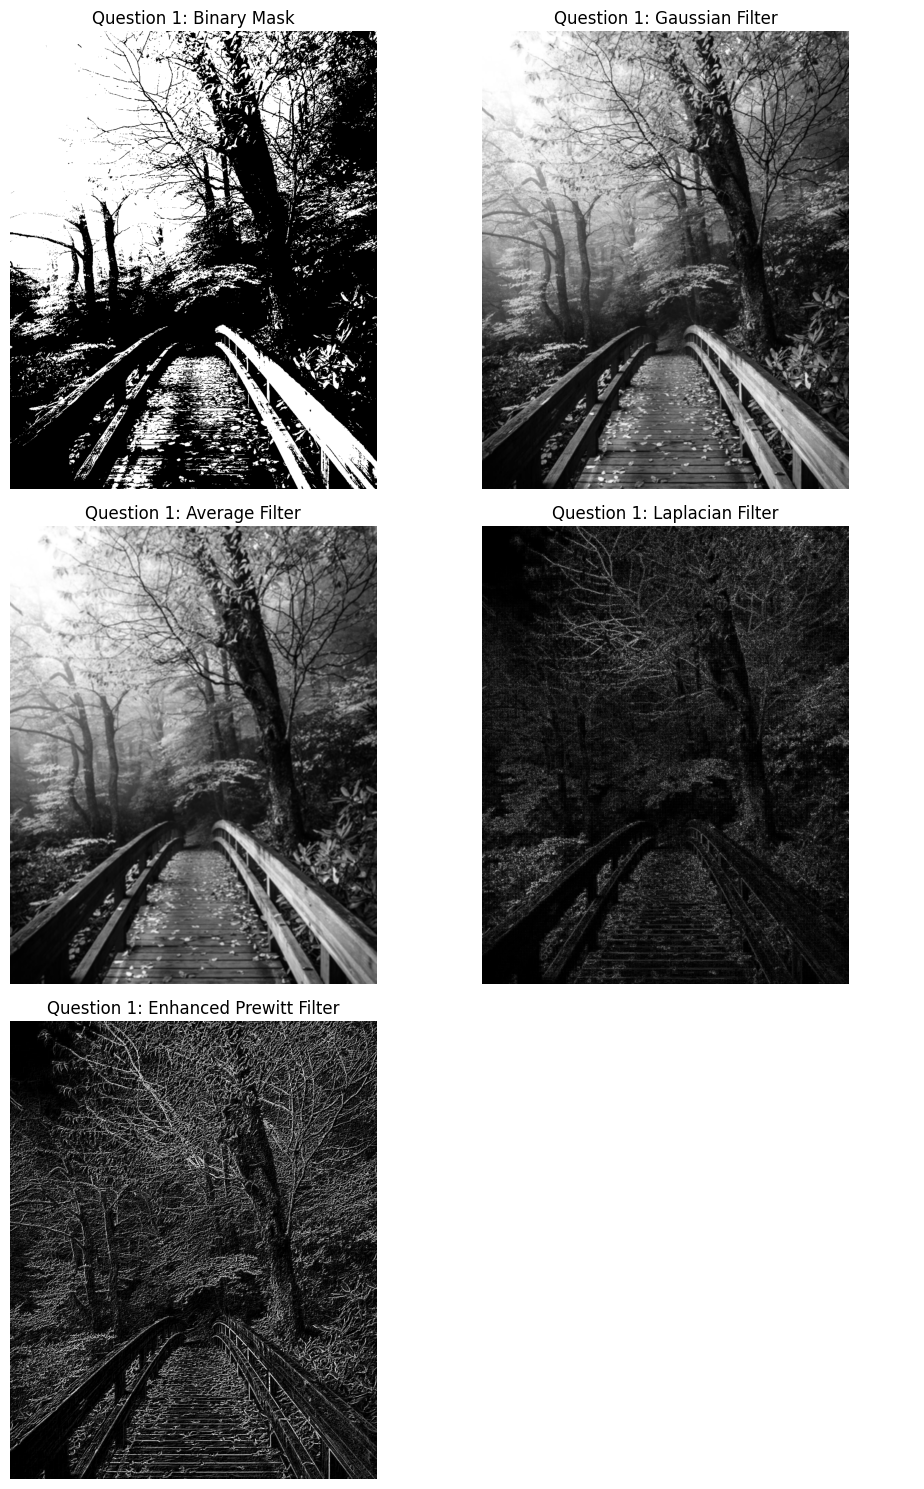

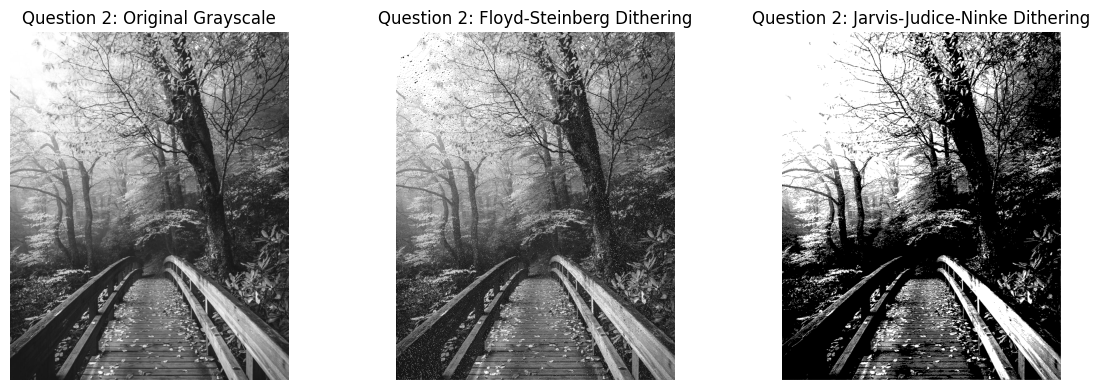

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Question 1: Apply filters and create a binary mask
# Load the image
sashiA2 = cv2.imread("C:/Users/reddy/Downloads/sashi_dip2_image.jpg")
sashiA2_gray = cv2.cvtColor(sashiA2, cv2.COLOR_BGR2GRAY)

# Create a binary mask for the region of interest
_, mask = cv2.threshold(sashiA2_gray, 120, 255, cv2.THRESH_BINARY)

# Apply Gaussian and Average filters (Low-pass filters)
gaussian_blur = cv2.GaussianBlur(sashiA2_gray, (5, 5), 0)
average_blur = cv2.blur(sashiA2_gray, (5, 5))

# Apply Laplacian and enhanced Prewitt filters (High-pass filters)
laplacian = cv2.Laplacian(sashiA2_gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # Convert back to uint8
prewitt_kernel_horizontal = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_kernel_vertical = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_horizontal = cv2.filter2D(sashiA2_gray, -1, prewitt_kernel_horizontal)
prewitt_vertical = cv2.filter2D(sashiA2_gray, -1, prewitt_kernel_vertical)
prewitt = prewitt_horizontal + prewitt_vertical
prewitt_normalized = cv2.normalize(prewitt, None, 0, 255, cv2.NORM_MINMAX)

# Display results for Question 1
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
ax = axes.ravel()
ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Question 1: Binary Mask")
ax[1].imshow(gaussian_blur, cmap='gray')
ax[1].set_title("Question 1: Gaussian Filter")
ax[2].imshow(average_blur, cmap='gray')
ax[2].set_title("Question 1: Average Filter")
ax[3].imshow(laplacian, cmap='gray')
ax[3].set_title("Question 1: Laplacian Filter")
ax[4].imshow(prewitt_normalized, cmap='gray')
ax[4].set_title("Question 1: Enhanced Prewitt Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 2: Implement Dithering Algorithms
# Load image and convert to grayscale
sashiA2 = Image.open("C:/Users/reddy/Downloads/sashi_dip2_image.jpg").convert('L')

# Floyd-Steinberg Dithering
def floyd_steinberg_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1]-1):
        for j in range(image.size[0]-1):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            if j+1 < image.size[0]:
                pix[i, j+1] += quant_error * 7 / 16
            if i+1 < image.size[1]:
                pix[i+1, j] += quant_error * 5 / 16
                if j+1 < image.size[0]:
                    pix[i+1, j+1] += quant_error * 1 / 16
                if j-1 >= 0:
                    pix[i+1, j-1] += quant_error * 3 / 16
    return Image.fromarray(pix)

# Jarvis-Judice-Ninke Dithering
def jarvis_judice_ninke_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1]-2):
        for j in range(image.size[0]-2):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            for k in range(3):
                if j+k-1 < image.size[0] and i+1 < image.size[1]:
                    pix[i+1, j+k-1] += quant_error * (1/48 if k == 0 else 5/48 if k == 1 else 3/48)
                if j+k-1 < image.size[0] and i+2 < image.size[1]:
                    pix[i+2, j+k-1] += quant_error * (1/48 if k == 0 else 3/48 if k == 1 else 1/48)
    return Image.fromarray(pix)

# Apply Dithering
fs_image = floyd_steinberg_dithering(sashiA2)
jjn_image = jarvis_judice_ninke_dithering(sashiA2)

# Display results for Question 2
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(sashiA2, cmap='gray')
ax[0].set_title("Question 2: Original Grayscale")
ax[1].imshow(fs_image, cmap='gray')
ax[1].set_title("Question 2: Floyd-Steinberg Dithering")
ax[2].imshow(jjn_image, cmap='gray')
ax[2].set_title("Question 2: Jarvis-Judice-Ninke Dithering")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


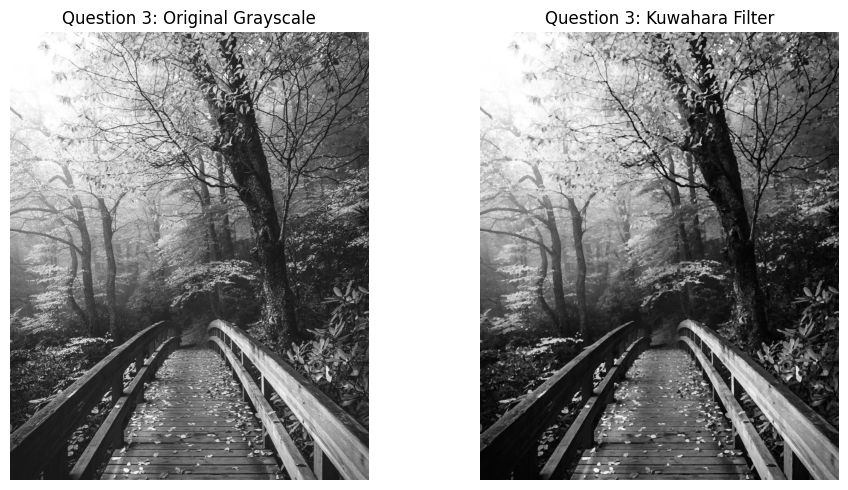

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_windows

# Load the image for Question 3
sashiA2 = cv2.imread("C:/Users/reddy/Downloads/sashi_dip2_image.jpg")
sashiA2_gray = cv2.cvtColor(sashiA2, cv2.COLOR_BGR2GRAY)

# Kuwahara filter implementation
def kuwahara_filter(image, window_size):
    hsize = window_size // 2
    padded_image = np.pad(image, hsize, mode='reflect')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extracting the subwindow
            window = padded_image[i:i + window_size, j:j + window_size]
            # Splitting the window into 4 overlapping regions
            regions = [
                window[:hsize+1, :hsize+1],
                window[:hsize+1, hsize:],
                window[hsize:, :hsize+1],
                window[hsize:, hsize:]
            ]
            # Calculating mean and variance for each region
            mean_variances = [(np.mean(region), np.var(region)) for region in regions]
            # Selecting the mean of the region with the smallest variance
            output_image[i, j] = min(mean_variances, key=lambda x: x[1])[0]

    return output_image

# Apply the Kuwahara filter with a window size of 5x5
kuwahara_result = kuwahara_filter(sashiA2_gray, 5)

# Display the original and Kuwahara filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sashiA2_gray, cmap='gray')
plt.title("Question 3: Original Grayscale")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(kuwahara_result, cmap='gray')
plt.title("Question 3: Kuwahara Filter")
plt.axis('off')
plt.tight_layout()
plt.show()


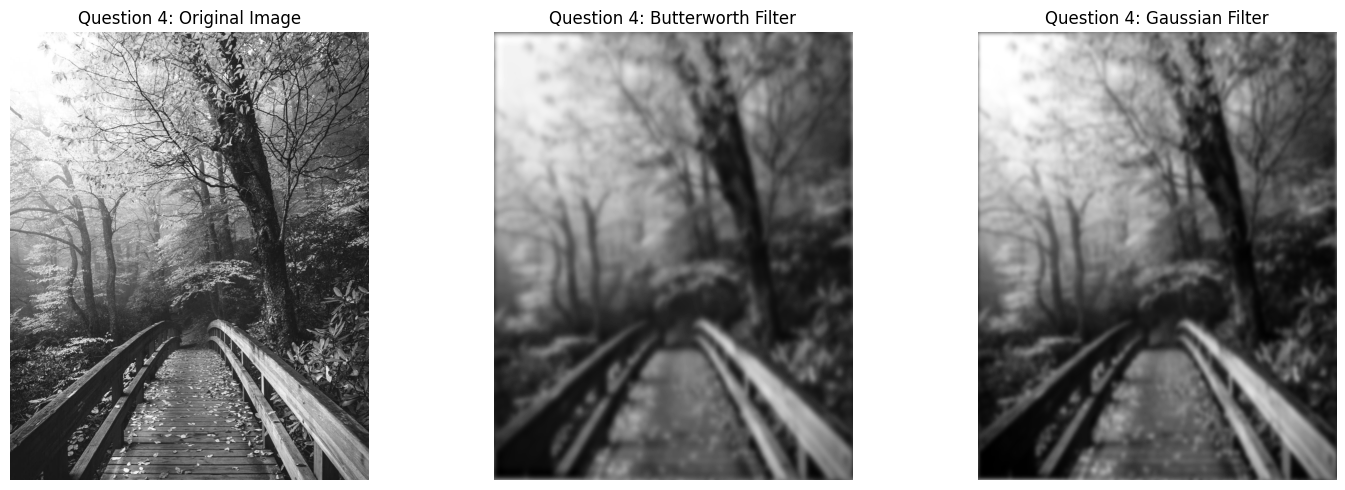

In [ ]:
# Load the image for Question 4
sashiA2 = cv2.imread("C:/Users/reddy/Downloads/sashi_dip2_image.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f_transform = np.fft.fft2(sashiA2)
f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

# Create Butterworth Low-Pass Filter
def butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    butterworth = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            butterworth[u, v] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return butterworth

# Create Gaussian Low-Pass Filter
def gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    gauss = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            gauss[u, v] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return gauss

# Apply Butterworth Filter
butter_filter = butterworth_filter(sashiA2.shape, cutoff=30, order=2)
f_butter = f_shift * butter_filter
butter_img = np.abs(np.fft.ifft2(np.fft.ifftshift(f_butter)))

# Apply Gaussian Filter
gauss_filter = gaussian_filter(sashiA2.shape, cutoff=30)
f_gauss = f_shift * gauss_filter
gauss_img = np.abs(np.fft.ifft2(np.fft.ifftshift(f_gauss)))

# Display original and filtered images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sashiA2, cmap='gray')
ax[0].set_title("Question 4: Original Image")
ax[1].imshow(butter_img, cmap='gray')
ax[1].set_title("Question 4: Butterworth Filter")
ax[2].imshow(gauss_img, cmap='gray')
ax[2].set_title("Question 4: Gaussian Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


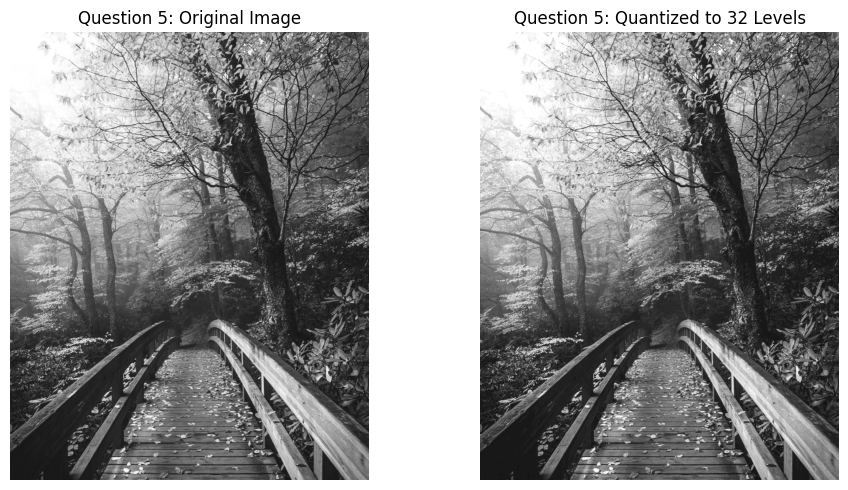

In [ ]:
# Load the image for Question 5
sashiA2 = cv2.imread("C:/Users/reddy/Downloads/sashi_dip2_image.jpg", cv2.IMREAD_GRAYSCALE)

# Quantize to 32 grayscale levels
quantized_image = (sashiA2 // 8) * 8  # Dividing and then multiplying to create 32 levels

# Display original and quantized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sashiA2, cmap='gray')
plt.title("Question 5: Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(quantized_image, cmap='gray')
plt.title("Question 5: Quantized to 32 Levels")
plt.axis('off')
plt.tight_layout()
plt.show()
